In [2]:
import pandas as pd

In [3]:
xls = pd.ExcelFile('data/Global Warming.xlsx')
global_warming = pd.read_excel(xls, 'data')
help = pd.read_excel(xls, 'help', header=None)
# data.dtypes['Date'] = pd.to_datetime(data['Date'])
global_warming.columns = help[2]
global_warming.tail()

2,Year,Month,Day,Average Temperature,Maximum temperature,Minimum temperature,Average atmospheric pressure at sea level,Average atmospheric pressure at the station level,Average relative humidity,Total rainfall and / or snowmelt,Average visibility,Average wind speed,Maximum sustained wind speed,Maximum speed of wind,Indicator for occurrence of: Fog,Indicator for occurrence of: Rain or Drizzle,Indicator for occurrence of: Snow or Ice Pellets,Indicator for occurrence of: Hail,Indicator for occurrence of: Thunder,Indicator for occurrence of: Tornado / Funnel cloud
1821,1995,12,27,9.7,11.0,6.5,1008.8,941.1,87,6.1,10.1,11.7,22.2,33.5,0,1,0,0,0,0
1822,1995,12,28,11.3,14.0,8.0,1012.8,945,78,0,12.4,14.6,22.2,40.7,0,1,0,0,0,0
1823,1995,12,29,9.0,10.2,7.6,1011.6,943.1,95,7.87,6.9,8.5,16.5,-,0,1,0,0,0,0
1824,1995,12,30,11.5,14.0,8.8,1001.6,935.1,91,21.08,10.3,17.8,29.4,53.5,0,1,0,0,0,0
1825,1995,12,31,11.3,14.0,8.0,1004.8,937.7,79,1.02,12.4,19.8,37,51.9,0,1,0,0,0,0


In [4]:
global_warming.dtypes

2
Year                                                     int64
Month                                                    int64
Day                                                      int64
Average Temperature                                    float64
Maximum temperature                                    float64
Minimum temperature                                    float64
Average atmospheric pressure at sea level               object
Average atmospheric pressure at the station level       object
Average relative humidity                               object
Total rainfall and / or snowmelt                        object
Average visibility                                     float64
Average wind speed                                     float64
Maximum sustained wind speed                            object
Maximum speed of wind                                   object
Indicator for occurrence of: Fog                         int64
Indicator for occurrence of: Rain or Drizzle         

In [5]:
data = pd.DataFrame()
for metric in global_warming.columns[3:]:
    if global_warming[metric].dtypes == 'float64' or global_warming[metric].dtypes == 'int64':
        data[metric] = global_warming[metric]
data.head()

,Average Temperature,Maximum temperature,Minimum temperature,Average visibility,Average wind speed,Indicator for occurrence of: Fog,Indicator for occurrence of: Rain or Drizzle,Indicator for occurrence of: Snow or Ice Pellets,Indicator for occurrence of: Hail,Indicator for occurrence of: Thunder,Indicator for occurrence of: Tornado / Funnel cloud
0,5.3,9.6,0.0,3.4,2.4,1,0,0,0,0,0
1,2.6,6.4,0.0,3.7,4.1,1,0,0,0,0,0
2,2.3,5.2,-1.0,2.6,2.0,1,0,0,0,0,0
3,3.9,10.0,0.0,8.0,4.4,1,0,0,0,0,0
4,2.9,10.4,-3.0,10.5,5.2,0,0,0,0,0,0


In [6]:
data.isnull().sum()

Average Temperature                                    0
Maximum temperature                                    0
Minimum temperature                                    0
Average visibility                                     0
Average wind speed                                     0
Indicator for occurrence of: Fog                       0
Indicator for occurrence of: Rain or Drizzle           0
Indicator for occurrence of: Snow or Ice Pellets       0
Indicator for occurrence of: Hail                      0
Indicator for occurrence of: Thunder                   0
Indicator for occurrence of: Tornado / Funnel cloud    0
dtype: int64

Missing data

In [7]:
import statistics

def handle_missing(data, col_name):
    """Handle missing values in a column."""
    new_col = []
    for i in data[col_name]:
        if pd.isnull(i) == True:
            # range of 10 elements, 5 before 5 after  
            i = statistics.mean(data[col_name][data[col_name].index(i)-5 : data[col_name].index(i)+5])
        new_col.append(i)
    data[col_name] = new_col

Outliers

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_transformed = MinMaxScaler().fit_transform(data)
standard_transformed = StandardScaler().fit_transform(data)

Line Plot

In [9]:
years = set(global_warming['Year'])
avg_temp_per_year = []
for year in years:
    avg_temp = sum(global_warming[global_warming['Year']==year]['Average Temperature'])/len(global_warming[global_warming['Year']==year]['Average Temperature'])
    avg_temp_per_year.append(avg_temp)
avg_temp_per_year, years

([13.735342465753437,
  13.769125683060116,
  13.619178082191784,
  15.23205479452056,
  15.87643835616438],
 {1991, 1992, 1993, 1994, 1995})

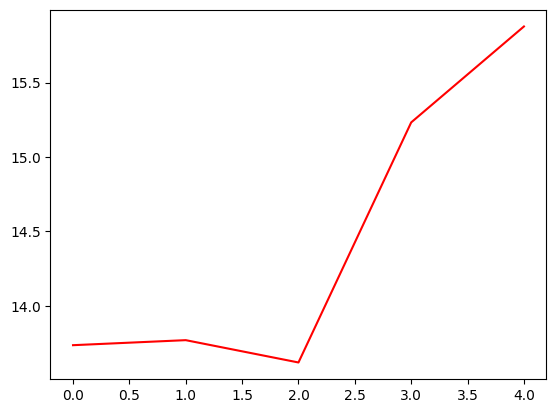

In [10]:
import matplotlib.pyplot as plt

plt.plot(avg_temp_per_year, color='r')
plt.show()

Corelation

In [11]:
# Pearson Corelation
import numpy as np

def pearson_corelation(X, Y):
    '''
    Used for linear samples
    '''
    x_mean = sum(X)/len(X)
    y_mean = sum(Y)/len(Y)
    xy, x_sq, y_sq = [], [], []
    for x, y in zip(X, Y):
        x_diff = x - x_mean
        y_diff = y-y_mean 
        
        xy.append(x_diff * y_diff)
        x_sq.append(x_diff**2)
        y_sq.append(y_diff**2)
        
    xy_sum = sum(xy)
    xy_sq_r_sum = np.sqrt(sum(x_sq)) * np.sqrt(sum(y_sq))
    
    return xy_sum/xy_sq_r_sum

def spearmans_corelation(X, Y):
    '''
    Used for non-linear samples
    '''
    x_ranked = sorted(X)
    y_ranked = sorted(Y)
    
    di = []
    for xi, yi in zip(x_ranked, y_ranked):
        di.append((xi - yi)**2)
        
    numerator = sum(di) * 6
    denominator = len(X) * (len(X)**2 -1)
    return numerator/denominator


print(round(pearson_corelation(data['Maximum temperature'], data['Minimum temperature']), 7))

0.8400868


In [12]:
# computing corelation coefficients
corelation = []
for i in data:
    row = []
    for j in data:
        # if data[i].dtypes == "float64" and data[j].dtypes == "float64":
            row.append(round(pearson_corelation(data[i], data[j]), 7))
    corelation.append(row)

corelation = corelation[:-1]
final_corelation = []
for corr in corelation:
    final_corelation.append(corr[:-1])
    print(corr[:-1])

C:\Users\HomePC\AppData\Local\Temp\ipykernel_1964\3830959765.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return xy_sum/xy_sq_r_sum


[1.0, 0.9660734, 0.9396874, 0.3972182, 0.1092575, -0.2634049, -0.1219585, -0.0766857, -0.0189085, 0.2078279]
[0.9660734, 1.0, 0.8400868, 0.4017209, -0.0037542, -0.2788578, -0.2232414, -0.0888602, -0.0218093, 0.2044442]
[0.9396874, 0.8400868, 1.0, 0.3214034, 0.2301105, -0.2135929, 0.0531184, -0.0615027, -0.0103454, 0.2478719]
[0.3972182, 0.4017209, 0.3214034, 1.0, 0.3187342, -0.6322756, -0.1176154, -0.0541993, 0.0130122, 0.0299418]
[0.1092575, -0.0037542, 0.2301105, 0.3187342, 1.0, -0.2080432, 0.2174242, 0.0158861, 0.0640355, 0.0213077]
[-0.2634049, -0.2788578, -0.2135929, -0.6322756, -0.2080432, 1.0, -0.0223582, 0.0178266, 0.0098136, -0.0634722]
[-0.1219585, -0.2232414, 0.0531184, -0.1176154, 0.2174242, -0.0223582, 1.0, 0.0999818, 0.1402706, 0.3341319]
[-0.0766857, -0.0888602, -0.0615027, -0.0541993, 0.0158861, 0.0178266, 0.0999818, 1.0, 0.2091516, 0.0187543]
[-0.0189085, -0.0218093, -0.0103454, 0.0130122, 0.0640355, 0.0098136, 0.1402706, 0.2091516, 1.0, 0.0709749]
[0.2078279, 0.204444

Heatmap

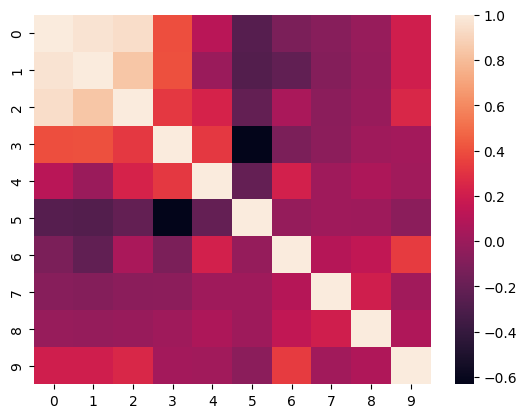

In [13]:
import seaborn as sns

# labels=['Open', 'High', 'Low', 'Close', 'Volume']
hm = sns.heatmap(final_corelation)
plt.show()